
[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


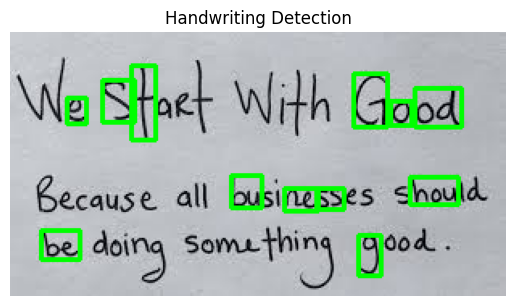

In [19]:
# In[1]:


get_ipython().system('pip install opencv-python numpy matplotlib')


# In[2]:Import necessary packages 


import cv2
import numpy as np
import matplotlib.pyplot as plt


# In[3]:Define a function to read the image,Convert the image to grayscale,
#Apply Gaussian blur to reduce noise and improve edge detection,
#Use Canny edge detector to find edges in the image,
#Find contours in the edged image,
#Filter contours based on area to keep only potential text regions,
#Draw bounding boxes around potential text regions.


def detect_handwriting(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Use Canny edge detector to find edges in the image
    edges = cv2.Canny(blurred, 50, 150)

    # Find contours in the edged image
    contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on area to keep only potential text regions
    min_area = 100
    text_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

    # Draw bounding boxes around potential text regions
    img_copy = img.copy()
    for contour in text_contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Display the result
    img_rgb = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title('Handwriting Detection')
    plt.axis('off')
    plt.show()

# Path to the image containing handwriting
image_path = 'images.jpeg'

# Perform handwriting detection
detect_handwriting(image_path)


# Display the image




